On adapte l'article d'Acemoglu-Akcigit-Kerr à notre projet. Ainsi, nous modélisons la convergence technologique comme un processus cumulatif structuré par un réseau historique de proximités technologiques, mesuré par les cooccurrences passées de codes CPC.

On peut s’appuyer sur cette méthodologie des réseaux d’innovation en remplaçant les flux de citations par des cooccurrences de codes CPC sur un même brevet et qui mesurent une interaction technologique. Dans le modèle de l’article, le réseau passé structure l’innovation future et la prédit ; tandis que dans notre modèle, le réseau passé indiquera ce qui est banal, original, ou émergent.   L’innovation observée concernera pour nous la nouveauté combinatoire. Il nous sera ainsi possible de reprendre leur modèle économétrique en calculant les convergences prédites par le réseau : si des domaines voisins convergent fortement sur la période étudiée, alors ils sont davantage exposés à une convergence dans le futur. Cela nous amène à aborder la convergence technologique comme une dynamique cumulative expliquée par l’espace technologique hérité des années précédentes. 

In [2]:
import pandas as pd
import itertools
import numpy as np


In [ ]:
# à mettre dans le terminal : gdown https://drive.google.com/uc?id=1Zi2RFRuZZf_OWDaocgcxhFcOsjqWrxJv

In [3]:

base_brevets = pd.read_parquet("patents_merged.parquet")

In [4]:
base_brevets.head()

,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants
0,1911230,1911230,EP-1911230,20110105,"[H04L, H04B]",[8964],[QUALCOMM Incorporated],"[5775 Morehouse Drive,San Diego, CA 92121]",[None],[92121],[US06073],[US],[1.0],[1.0],1
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1
2,1932561,1932561,EP-1932561,20100217,"[A61B, A61N]",[46971525],[Commissariat à l'Energie Atomique],"[25, rue Leblanc Immeuble 'Le Ponant D',75015 ...",[Paris],[75015],[FR101],[FR],[1.0],[1.0],1
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1
4,1977104,1977104,EP-1977104,20091021,[F02M],[25653],"[KIMBERLY-CLARK WORLDWIDE, INC.]","[401 North Lake Street,Neenah, WI 54956]",[None],[54956],[US55139],[US],[1.0],[1.0],1


In [5]:
len(base_brevets)

2382887

In [6]:
base_brevets["year"] = base_brevets["publication_date"].astype(str).str[:4].astype(int)

In [7]:
base_brevets.head()

,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants,year
0,1911230,1911230,EP-1911230,20110105,"[H04L, H04B]",[8964],[QUALCOMM Incorporated],"[5775 Morehouse Drive,San Diego, CA 92121]",[None],[92121],[US06073],[US],[1.0],[1.0],1,2011
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1,2009
2,1932561,1932561,EP-1932561,20100217,"[A61B, A61N]",[46971525],[Commissariat à l'Energie Atomique],"[25, rue Leblanc Immeuble 'Le Ponant D',75015 ...",[Paris],[75015],[FR101],[FR],[1.0],[1.0],1,2010
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1,2017
4,1977104,1977104,EP-1977104,20091021,[F02M],[25653],"[KIMBERLY-CLARK WORLDWIDE, INC.]","[401 North Lake Street,Neenah, WI 54956]",[None],[54956],[US55139],[US],[1.0],[1.0],1,2009


In [ ]:
# on ne prend que les 3 premiers caractères des codes dans un premier temps pour regarder la convergence entre des domaines différents

def extract_classe(c):
    return c[:3]

base_brevets["liste_classes"] = base_brevets["cpc4_list"].apply(
    lambda arr: list({extract_classe(c) for c in arr})
)

base_brevets.head()

,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants,year,liste_classes
0,1911230,1911230,EP-1911230,20110105,"[H04L, H04B]",[8964],[QUALCOMM Incorporated],"[5775 Morehouse Drive,San Diego, CA 92121]",[None],[92121],[US06073],[US],[1.0],[1.0],1,2011,[H04]
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1,2009,"[H01, C09, C08]"
2,1932561,1932561,EP-1932561,20100217,"[A61B, A61N]",[46971525],[Commissariat à l'Energie Atomique],"[25, rue Leblanc Immeuble 'Le Ponant D',75015 ...",[Paris],[75015],[FR101],[FR],[1.0],[1.0],1,2010,[A61]
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1,2017,"[B60, Y02]"
4,1977104,1977104,EP-1977104,20091021,[F02M],[25653],"[KIMBERLY-CLARK WORLDWIDE, INC.]","[401 North Lake Street,Neenah, WI 54956]",[None],[54956],[US55139],[US],[1.0],[1.0],1,2009,[F02]


In [10]:
# du coup on ne va garder que les brevets qui ont plus de deux codes dans liste_classes

multi_codes_brevets = base_brevets[base_brevets["liste_classes"].apply(lambda x: len(x) > 1)]

print("Nombre de brevets avec plusieurs CPC :", multi_codes_brevets.shape[0])
multi_codes_brevets.head()


Nombre de brevets avec plusieurs CPC : 1234382


,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants,year,liste_classes
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1,2009,"[H01, C09, C08]"
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1,2017,"[B60, Y02]"
9,1984837,1984837,EP-1984837,20190508,"[H04L, H04J, G04G, G06F]",[51285633],[Microsemi Frequency and Time Corporation],"[2300 Orchard Parkway,San Jose, California 951...",[SAN JOSE California],[1017],[US06085],[US],[1.0],[1.0],1,2019,"[G06, H04, G04]"
10,1983865,1983865,EP-1983865,20150325,"[A61G, A47C]",[2010020],"[Hill-Rom Services, Inc.]","[1069 State Route 46 East,Batesville IN 47006]",[None],[47006],[US18137],[US],[1.0],[1.0],1,2015,"[A47, A61]"
13,1987085,1987085,EP-1987085,20090715,"[C08C, Y10S, C08J]",[291826],[KRATON Polymers Research B.V.],[Intellectual Property Services P.O. Box 37666...,[Amsterdam],[1030],[NL326],[NL],[1.0],[1.0],1,2009,"[Y10, C08]"


In [11]:
multi_codes_brevets.to_csv("multi_codes_brevets.csv", index=False)

In [12]:
multi_codes_brevets["year"].min(), multi_codes_brevets["year"].max()


(np.int64(1980), np.int64(2025))

## 1. Construction de la matrice de coocurrence historique (1980-2000)
L’objectif de cette étape est de caractériser l’espace technologique hérité, en mesurant quelles technologies (codes CPC) apparaissent fréquemment ensemble dans les brevets sur une période de référence.  
Cette matrice servira de réseau technologique structurant l’innovation future.


In [13]:
# Période de référence
base_1980_2000 = multi_codes_brevets[(multi_codes_brevets["year"] >= 1980) & (multi_codes_brevets["year"] <= 2000)].copy()




**Comptage des cooccurrences entre codes CPC**

Pour chaque brevet, on considère toutes les paires possibles de codes CPC.  
Chaque paire (i, j) indique que les technologies i et j sont mobilisées conjointement dans une même innovation.
Nous construisons ici une matrice de cooccurrence orientée, permettant de mesurer des proximités conditionnelles entre technologies.


In [14]:
# on compte les paires CPC
from collections import Counter

pair_counter = Counter()

for cpcs in base_1980_2000["liste_classes"]:
    for i, j in itertools.combinations(sorted(set(cpcs)), 2):
        pair_counter[(i, j)] += 1
        pair_counter[(j, i)] += 1  # matrice orientée


Mise en forme de la matrice de cooccurrence

Les comptages de cooccurrences sont transformés en un DataFrame afin de faciliter les opérations de normalisation et d’analyse ultérieures.


In [15]:
# on transforme la matrice en dataframe
cooc_df = pd.DataFrame(
    [(i, j, c) for (i, j), c in pair_counter.items()],
    columns=["cpc_i", "cpc_j", "count"]
)
cooc_df.head()

,cpc_i,cpc_j,count
0,H01,H10,2737
1,H10,H01,2737
2,G11,H03,640
3,H03,G11,640
4,C04,Y10,1226


**Normalisation de la matrice de cooccurrence**

Afin de passer de volumes bruts à des proximités technologiques comparables,  on normalise chaque ligne de la matrice de cooccurrence.

La quantité M_{i→j} mesure la probabilité d’observer la technologie j conditionnellement à l’utilisation de la technologie i.


In [16]:
# Somme des cooccurrences sortantes pour chaque CPC i
row_sums = cooc_df.groupby("cpc_i")["count"].sum().reset_index()
row_sums.columns = ["cpc_i", "row_sum"]

# Fusion avec la matrice principale
cooc_df = cooc_df.merge(row_sums, on="cpc_i")

# Normalisation
cooc_df["M_ij"] = cooc_df["count"] / cooc_df["row_sum"]


In [17]:
cooc_df.head()

,cpc_i,cpc_j,count,row_sum,M_ij
0,H01,H10,2737,34965,0.078278
1,H10,H01,2737,9486,0.288530
2,G11,H03,640,9112,0.070237
3,H03,G11,640,6237,0.102613
4,C04,Y10,1226,9662,0.126889


**Mesure de l’originalité des combinaisons technologiques**

L’originalité d’une combinaison de technologies est définie comme l’inverse de sa fréquence historique.  
Une combinaison rarement observée dans le passé est considérée comme plus originale.

On utilise une transformation logarithmique afin d’amplifier les différences entre combinaisons fréquentes et rares.


In [18]:
EPS = 1e-10
cooc_df["originality_pair"] = -np.log(cooc_df["M_ij"] + EPS)


**Calcul de l’originalité d’un brevet**

Pour chaque brevet postérieur à la période de référence, on calcule un score d’originalité en moyennant l’originalité de toutes les paires de codes CPC qu’il mobilise.

Ce score mesure la nouveauté combinatoire de l’innovation.


In [19]:
# dictionnaire
orig_dict = {
    (row.cpc_i, row.cpc_j): row.originality_pair
    for _, row in cooc_df.iterrows()
}


On crée une fonction qui donne l'originalité d'un brevet

In [20]:
def originality_of_patent(cpcs, orig_dict):
    pairs = list(itertools.combinations(sorted(set(cpcs)), 2))
    scores = []
    for i, j in pairs:
        if (i, j) in orig_dict:
            scores.append(orig_dict[(i, j)])
        else:
            # combinaison jamais observée historiquement
            scores.append(-np.log(EPS))
    return np.mean(scores) if scores else np.nan


**Application du score d’originalité aux brevets récents**

Nous appliquons le score d’originalité aux brevets publiés après 2010 afin d’analyser la dynamique de convergence technologique.


In [23]:
brevets_post_2000 = multi_codes_brevets[multi_codes_brevets["year"] > 2000].copy()

brevets_post_2000["originality"] = brevets_post_2000["liste_classes"].apply(
    lambda x: originality_of_patent(x, orig_dict)
)


**Construction de l’indice de convergence technologique observée**

Afin d’analyser la convergence technologique à un niveau agrégé,  
nous construisons un indice annuel de convergence par domaine technologique.

Pour cela, nous :
- identifions un code CPC principal pour chaque brevet,
- agrégeons les scores d’originalité au niveau (CPC, année).

Cet indice mesure l’intensité moyenne de la nouveauté combinatoire produite par un domaine donné à une date donnée.


In [25]:
# On définit le CPC principal comme le premier de la liste
brevets_post_2000["main_cpc"] = brevets_post_2000["liste_classes"].apply(lambda x: x[0])

# Indice de convergence observée
CI_obs = (
    brevets_post_2000
    .groupby(["main_cpc", "year"])["originality"]
    .mean()
    .reset_index()
    .rename(columns={"originality": "CI_obs"})
)


**Interprétation de l’indice de convergence observée**

Une valeur élevée de l’indice CI_obs indique que, en moyenne, les brevets du domaine concerné combinent des technologies historiquement éloignées.

Cet indicateur constitue notre mesure empirique de la convergence technologique.


**Construction de la convergence prédite par le réseau**

Dans la lignée d’Acemoglu,  Akcigit et Kerr (2016), nous utilisons le réseau technologique historique pour prédire la convergence future.

L’idée est la suivante : si un domaine est connecté à des domaines qui convergent fortement, alors il est structurellement exposé à une convergence future.

La convergence prédite est une moyenne pondérée des convergences passées des domaines voisins.


In [26]:
# On décale l'indice observé d'une année
CI_lag = CI_obs.copy()
CI_lag["year"] += 1
CI_lag = CI_lag.rename(columns={"CI_obs": "CI_lag"})


In [27]:
# construction de la convergence prédite
# Jointure réseau historique × convergence passée
CI_pred = (
    cooc_df[["cpc_i", "cpc_j", "M_ij"]]
    .merge(
        CI_lag,
        left_on="cpc_j",
        right_on="main_cpc",
        how="inner"
    )
)

# Pondération par les poids du réseau
CI_pred["weighted_CI"] = CI_pred["M_ij"] * CI_pred["CI_lag"]

# Agrégation finale
CI_pred = (
    CI_pred
    .groupby(["cpc_i", "year"])["weighted_CI"]
    .sum()
    .reset_index()
    .rename(columns={
        "cpc_i": "main_cpc",
        "weighted_CI": "CI_pred"
    })
)


**Lecture de la convergence prédite**

La variable CI_pred mesure la convergence qu’un domaine devrait connaître au regard de sa position dans l’espace technologique hérité.

Elle capte une dynamique cumulative de la convergence,
indépendante des innovations propres au domaine considéré.


**Construction de la base de données de panel**

Nous construisons une base de données de type panel, où chaque observation correspond à un couple (domaine technologique, année).

Cette base permet d’estimer économétriquement le rôle structurant du réseau technologique dans la convergence.


In [28]:
panel = (
    CI_obs
    .merge(
        CI_pred,
        on=["main_cpc", "year"],
        how="inner"
    )
)


## Modèle économétrique

Nous estimons le modèle suivant :

CI_{k,t} = β · CÎ_{k,t} + φ_k + η_t + ε_{k,t}

où :
- CI_{k,t} est la convergence observée,
- CÎ_{k,t} est la convergence prédite par le réseau,
- φ_k sont des effets fixes domaine,
- η_t sont des effets fixes temporels.

Le paramètre β mesure l’intensité de la dynamique cumulative de convergence.


In [30]:
import statsmodels.formula.api as smf

model = smf.ols(
    "CI_obs ~ CI_pred + C(main_cpc) + C(year)",
    data=panel
).fit(cov_type="HC1")


In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 CI_obs   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:38:55   Log-Likelihood:                -3860.4
No. Observations:                2980   AIC:                             8027.
Df Residuals:                    2827   BIC:                             8945.
Df Model:                         152                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.0005      0

**Interprétation des résultats**

Un coefficient β positif et significatif indique que
la convergence technologique est en partie expliquée
par la structure héritée de l’espace technologique.

Cela suggère que la convergence n’est pas aléatoire,
mais résulte d’une dynamique cumulative structurée par les interactions passées entre technologies.


## Évolution temporelle moyenne de la convergence technologique

Nous représentons l’évolution moyenne de l’indice de convergence afin d’identifier des tendances globales dans la dynamique d’innovation.


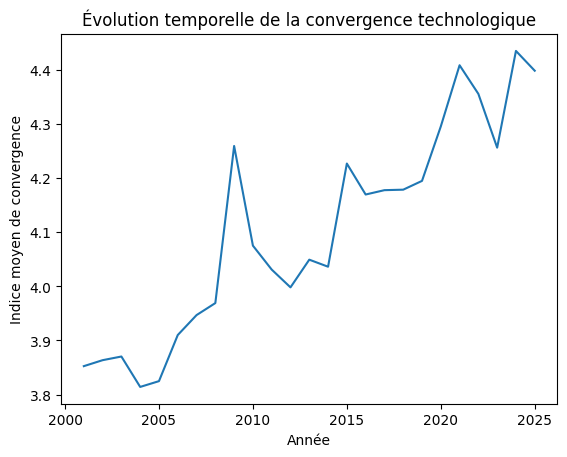

In [32]:
# série temporelle
import matplotlib.pyplot as plt

CI_time = (
    CI_obs
    .groupby("year")["CI_obs"]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(CI_time["year"], CI_time["CI_obs"])
plt.xlabel("Année")
plt.ylabel("Indice moyen de convergence")
plt.title("Évolution temporelle de la convergence technologique")
plt.show()


## Visualisation du réseau technologique

Afin de visualiser l’espace technologique,
nous représentons les liens les plus forts du réseau de cooccurrence historique.


In [34]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.7 MB/s  0:00:00


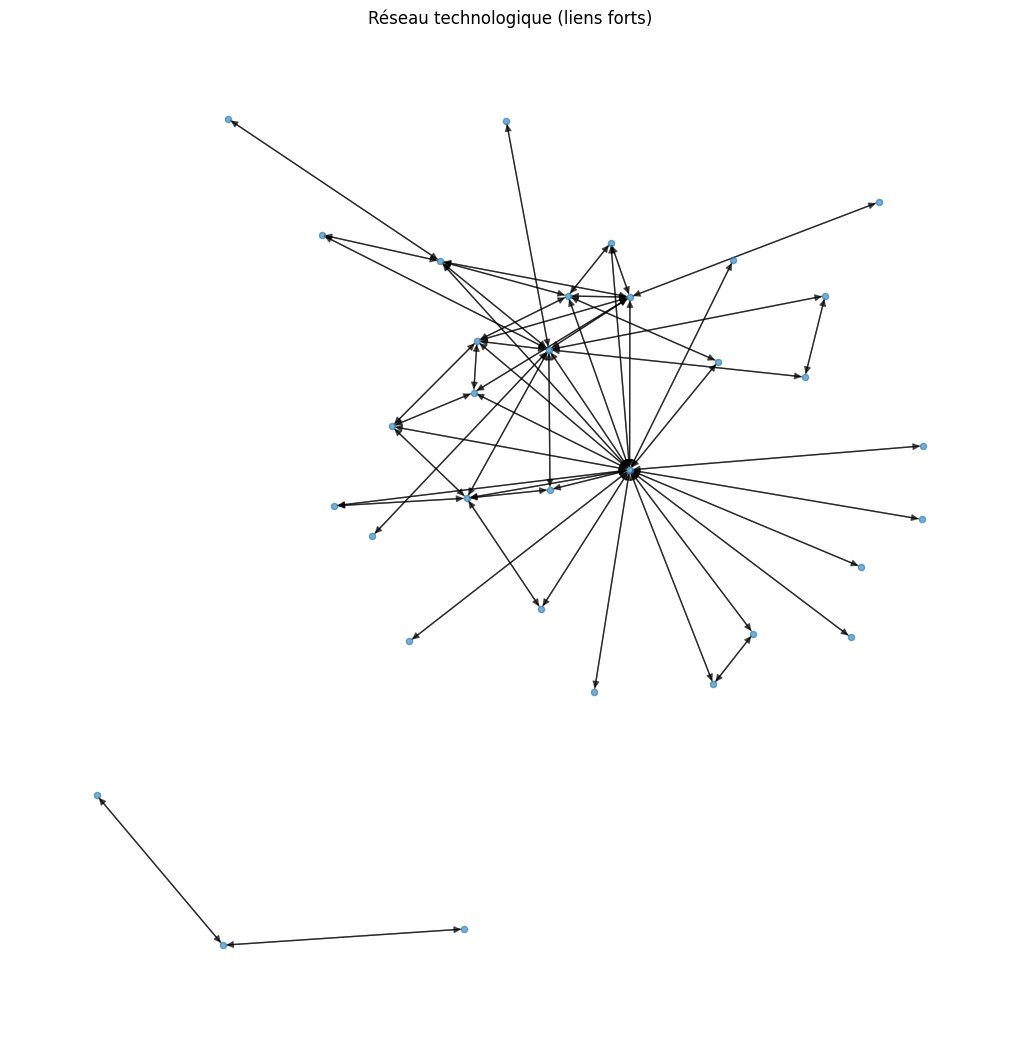

In [35]:
import networkx as nx

# On garde les liens les plus significatifs
edges = cooc_df[cooc_df["count"] > cooc_df["count"].quantile(0.99)]

G = nx.from_pandas_edgelist(
    edges,
    source="cpc_i",
    target="cpc_j",
    edge_attr="count",
    create_using=nx.DiGraph()
)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, node_size=20, alpha=0.6)
plt.title("Réseau technologique (liens forts)")
plt.show()
